In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics



In [176]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns',None)

In [177]:
data=pd.read_csv('final_df_.csv')
data.head().T

,0,1,2,3,4
ethnicity_Caucasian,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
ethnicity_Other,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
gender_M,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
icu_admit_source_Floor,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icu_admit_source_Operating Room / Recovery,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
icu_admit_source_Other,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icu_stay_type_readmit,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icu_stay_type_transfer,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icu_type_CSICU,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
icu_type_CTICU,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00


In [178]:
data.shape

(91713, 103)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 103 entries, ethnicity_Caucasian to hospital_death
dtypes: float64(70), int64(33)
memory usage: 72.1 MB


In [180]:
data.columns

Index(['ethnicity_Caucasian', 'ethnicity_Other', 'gender_M',
       'icu_admit_source_Floor', 'icu_admit_source_Operating Room / Recovery',
       'icu_admit_source_Other', 'icu_stay_type_readmit',
       'icu_stay_type_transfer', 'icu_type_CSICU', 'icu_type_CTICU',
       ...
       'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'hospital_death'],
      dtype='object', length=103)

In [181]:
data_no=pd.DataFrame()
for i in data.columns:
    if data[i].nunique()>2:
        data_no[i]=data[i]
data_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            91713 non-null  float64
 1   bmi                            91713 non-null  float64
 2   height                         91713 non-null  float64
 3   pre_icu_los_days               91713 non-null  float64
 4   weight                         91713 non-null  float64
 5   apache_2_diagnosis             91713 non-null  float64
 6   apache_3j_diagnosis            91713 non-null  float64
 7   gcs_eyes_apache                91713 non-null  float64
 8   gcs_motor_apache               91713 non-null  float64
 9   gcs_verbal_apache              91713 non-null  float64
 10  heart_rate_apache              91713 non-null  float64
 11  map_apache                     91713 non-null  float64
 12  resprate_apache                91713 non-null 

### Scaling

In [182]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_no=pd.DataFrame(scaler.fit_transform(data_no),columns=data_no.columns)

#### binary column

In [183]:
data_not_no=pd.DataFrame()
for i in data.columns:
    if data[i].nunique()==2:
        data_not_no[i]=data[i]
data_not_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ethnicity_Caucasian                         91713 non-null  int64  
 1   ethnicity_Other                             91713 non-null  int64  
 2   gender_M                                    91713 non-null  int64  
 3   icu_admit_source_Floor                      91713 non-null  int64  
 4   icu_admit_source_Operating Room / Recovery  91713 non-null  int64  
 5   icu_admit_source_Other                      91713 non-null  int64  
 6   icu_stay_type_transfer                      91713 non-null  int64  
 7   icu_type_CSICU                              91713 non-null  int64  
 8   icu_type_CTICU                              91713 non-null  int64  
 9   icu_type_Cardiac ICU                        91713 non-null  int64  
 10  icu_type_M

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X, thresh=5):
    X = X.assign(const=1)
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        vif = vif[:-1]  # don't let the constant be removed in the loop.
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables:')
    print(variables)
    print(X.columns[variables[:-1]])
    return X.iloc[:, variables[:-1]]

In [ ]:
calculate_vif_(data_no,thresh=5) 

dropping 'd1_diasbp_noninvasive_min' at index: 17
dropping 'd1_sysbp_noninvasive_min' at index: 30
dropping 'd1_sysbp_noninvasive_max' at index: 29
dropping 'd1_diasbp_noninvasive_max' at index: 16
dropping 'd1_mbp_min' at index: 19
dropping 'h1_mbp_noninvasive_min' at index: 38
dropping 'h1_sysbp_noninvasive_max' at index: 44
dropping 'weight' at index: 4
dropping 'd1_mbp_max' at index: 17
dropping 'h1_diasbp_min' at index: 28
dropping 'h1_sysbp_min' at index: 40
dropping 'h1_mbp_max' at index: 32
dropping 'h1_diasbp_noninvasive_max' at index: 28
dropping 'apache_4a_hospital_death_prob' at index: 43
dropping 'h1_heartrate_max' at index: 29
dropping 'h1_mbp_min' at index: 30
dropping 'h1_mbp_noninvasive_max' at index: 30
dropping 'd1_mbp_noninvasive_min' at index: 18
dropping 'h1_sysbp_noninvasive_min' at index: 34
Remaining variables:
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 22, 24, 25, 26, 27, 28, 29, 32, 33, 34, 37, 39, 44, 45, 46, 47, 48, 52, 53, 54, 55, 57, 58]


In [189]:
df_num=data_no[['age', 'bmi', 'height', 'pre_icu_los_days', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_noninvasive_max',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'h1_diasbp_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_max', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_icu_death_prob']]

In [190]:
df_num.shape

(91713, 39)

In [191]:
df=pd.concat([df_num,data_not_no],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 78 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         91713 non-null  float64
 1   bmi                                         91713 non-null  float64
 2   height                                      91713 non-null  float64
 3   pre_icu_los_days                            91713 non-null  float64
 4   apache_2_diagnosis                          91713 non-null  float64
 5   apache_3j_diagnosis                         91713 non-null  float64
 6   gcs_eyes_apache                             91713 non-null  float64
 7   gcs_motor_apache                            91713 non-null  float64
 8   gcs_verbal_apache                           91713 non-null  float64
 9   heart_rate_apache                           91713 non-null  float64
 10  map_apache

In [264]:
X=df.drop(['hospital_death'],axis=1)
y=df['hospital_death']

In [265]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64199, 77)
(27514, 77)
(64199,)
(27514,)


### Balancing

In [266]:
(y_train.value_counts()/len(y_train))*100

0    91.224162
1     8.775838
Name: hospital_death, dtype: float64

In [267]:
from imblearn.over_sampling import SMOTE

In [268]:
#Balancing
smote=SMOTE(sampling_strategy=0.2)
X_train,y_train=smote.fit_resample(X_train,y_train)
(y_train.value_counts()/len(y_train))*100

0    83.333333
1    16.666667
Name: hospital_death, dtype: float64

### Feature Selection

In [269]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset for demonstration
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
log_reg = LogisticRegression()

# Initialize Recursive Feature Elimination (RFE) with logistic regression model
rfe = RFE(estimator=log_reg, step=1)

# Fit RFE to training data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = rfe.support_

# Transform training and test sets to include only selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train logistic regression model on selected features
log_reg.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set with selected features:", accuracy)

Accuracy on test set with selected features: 0.9100457948680671


In [270]:
# Get the selected features (columns)
selected_columns = [column for column, selected in zip(range(X.shape[1]), rfe.support_) if selected]

# Extract the selected column names from the original dataset
original_column_names = [f'feature_{i}' for i in range(X.shape[1])]
selected_column_names = [original_column_names[i] for i in selected_columns]
column_index=[i for i in selected_columns]

# Convert the boolean mask to a DataFrame for better visualization
rfe_result_df = pd.DataFrame(data={'Feature': original_column_names, 'Selected': rfe.support_})

# Display the result
print("Selected Columns:", selected_column_names)
print("\nRFE Result:")

Selected Columns: ['feature_0', 'feature_5', 'feature_21', 'feature_23', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_43', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_71', 'feature_72', 'feature_74', 'feature_75', 'feature_76']

RFE Result:


In [271]:
# Using list comprehension
selected_column_names = [df.columns[i] for i in column_index]


In [272]:
df_rfe=df[selected_column_names]

In [273]:
df_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         91713 non-null  float64
 1   apache_3j_diagnosis                         91713 non-null  float64
 2   d1_spo2_min                                 91713 non-null  float64
 3   d1_sysbp_min                                91713 non-null  float64
 4   apache_4a_icu_death_prob                    91713 non-null  float64
 5   ethnicity_Caucasian                         91713 non-null  int64  
 6   ethnicity_Other                             91713 non-null  int64  
 7   gender_M                                    91713 non-null  int64  
 8   icu_admit_source_Operating Room / Recovery  91713 non-null  int64  
 9   icu_stay_type_transfer                      91713 non-null  int64  
 10  icu_type_C

In [274]:
log_reg_score = log_reg.score(X_train_selected, y_train)
print(log_reg_score)


0.8903924414468255


In [275]:
y_pred_train=log_reg.predict(X_train_selected)

In [276]:

print(confusion_matrix(y_train, y_pred_train))



print(metrics.classification_report(y_train, y_pred_train)) #logistic regression

[[56477  2088]
 [ 5615  6098]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     58565
           1       0.74      0.52      0.61     11713

    accuracy                           0.89     70278
   macro avg       0.83      0.74      0.77     70278
weighted avg       0.88      0.89      0.88     70278



In [277]:

print(confusion_matrix(y_test, y_pred))



print(metrics.classification_report(y_test, y_pred)) #logistic regression

[[24347   886]
 [ 1589   692]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     25233
           1       0.44      0.30      0.36      2281

    accuracy                           0.91     27514
   macro avg       0.69      0.63      0.66     27514
weighted avg       0.90      0.91      0.90     27514



In [278]:
#rfe gives us 38 column which are highly suitable for our classification problem.

In [279]:
import warnings
warnings.filterwarnings("ignore")


In [280]:

from sklearn.model_selection import train_test_split

In [281]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Getting Optimal  Threshold

In [282]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Load your dataset
#X, y = load_your_data()

# Create a logistic regression object
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the probabilities
probs = model.predict_proba(X)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, probs[:, 1])

# Calculate the AUC score
auc_score = roc_auc_score(y, probs[:, 1])

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold and AUC score
print("Optimal Threshold: %f" % optimal_threshold)
print("AUC Score: %f" % auc_score)


Optimal Threshold: 0.078119
AUC Score: 0.873508


In [283]:
print(probs)

[[0.94490625 0.05509375]
 [0.32514202 0.67485798]
 [0.99751179 0.00248821]
 ...
 [0.97406347 0.02593653]
 [0.9724048  0.0275952 ]
 [0.9090936  0.0909064 ]]


In [284]:
# Example: Adjusting threshold to maximize sensitivity or specificity
optimal_threshold # Adjust this threshold based on your analysis
y_pred_adjusted = (probs >= optimal_threshold).astype(int)


In [285]:
# Example: Retrain the model with the adjusted threshold
model_adjusted = LogisticRegression()
model_adjusted.fit(X_train, y_train)
y_pred_adjusted = (model_adjusted.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)


In [286]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example: Evaluate the model with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
confusion = confusion_matrix(y_test, y_pred_adjusted)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")


Accuracy: 0.7072762957040052
Precision: 0.19771703843334382
Recall: 0.8277071459886015
F1 Score: 0.31918850380388847
Confusion Matrix:
[[17572  7661]
 [  393  1888]]


In [287]:
print(metrics.classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.98      0.70      0.81     25233
           1       0.20      0.83      0.32      2281

    accuracy                           0.71     27514
   macro avg       0.59      0.76      0.57     27514
weighted avg       0.91      0.71      0.77     27514



In [288]:
#check for over fit
y_train_pred_adjusted = (model_adjusted.predict_proba(X_train)[:, 1] >= optimal_threshold).astype(int)


In [289]:
print(metrics.classification_report(y_train, y_train_pred_adjusted))


              precision    recall  f1-score   support

           0       0.98      0.70      0.81     58565
           1       0.38      0.91      0.53     11713

    accuracy                           0.73     70278
   macro avg       0.68      0.81      0.67     70278
weighted avg       0.88      0.73      0.77     70278



In [290]:
#clearly not overfit

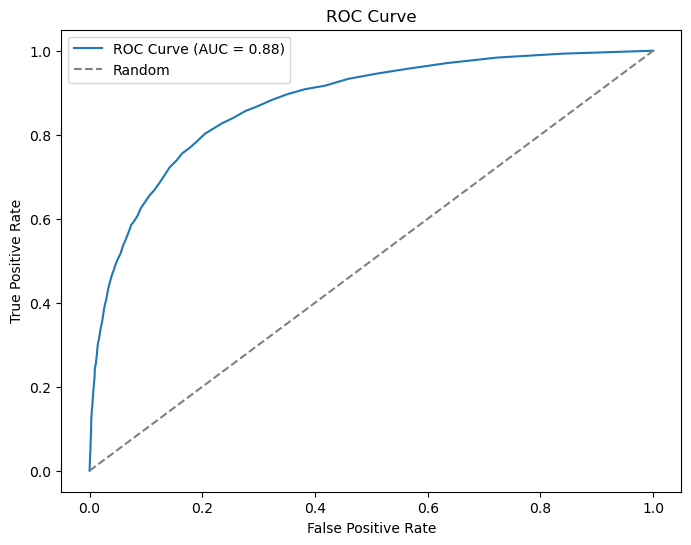

In [354]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_probabilities):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## --------------------------------------Naive Bayes----------------------------------------------------

In [291]:
from sklearn.naive_bayes import GaussianNB

In [292]:
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)
print(nbmodel)
# make predictions
expected = y_test
predicted = nbmodel.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     25233
           1       0.18      0.75      0.29      2281

    accuracy                           0.70     27514
   macro avg       0.58      0.72      0.55     27514
weighted avg       0.90      0.70      0.77     27514

[[17687  7546]
 [  581  1700]]


In [293]:
#Trying df_rfe obtained from logreg model


In [294]:
df_final=pd.concat([df_rfe,data['hospital_death']],axis=1)

In [295]:
X_rfe=df_final.drop('hospital_death',axis=1)
y_rfe=df_final['hospital_death']
X_rfe.shape

(91713, 38)

In [296]:
X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe=train_test_split(X_rfe,y_rfe,test_size=0.3,random_state=10)
print(X_train_rfe.shape)
print(X_test_rfe.shape)
print(y_train_rfe.shape)
print(y_test_rfe.shape)

(64199, 38)
(27514, 38)
(64199,)
(27514,)


In [297]:
nbmodel = GaussianNB()
nbmodel.fit(X_train_rfe, y_train_rfe)
print(nbmodel)
# make predictions
expected = y_test_rfe
predicted = nbmodel.predict(X_test_rfe)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     25233
           1       0.19      0.72      0.30      2281

    accuracy                           0.71     27514
   macro avg       0.58      0.72      0.56     27514
weighted avg       0.90      0.71      0.78     27514

[[17973  7260]
 [  629  1652]]


In [298]:
expected = y_train_rfe
predicted = nbmodel.predict(X_train_rfe)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     58565
           1       0.20      0.74      0.31      5634

    accuracy                           0.71     64199
   macro avg       0.58      0.73      0.57     64199
weighted avg       0.90      0.71      0.78     64199

[[41696 16869]
 [ 1473  4161]]


In [299]:
#Not much improvement on using Rfe columns acquired.

### _------------------------------------------KNN--------------------------------------------------------

In [300]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier( weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [301]:
predicted_labels = NNH.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))

[[23000  2233]
 [ 1252  1029]]


In [302]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels)) #k nearest neighbour 

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     25233
           1       0.32      0.45      0.37      2281

    accuracy                           0.87     27514
   macro avg       0.63      0.68      0.65     27514
weighted avg       0.90      0.87      0.88     27514



### ---------------------------------------Decision Tree--------------------------------------------------

In [303]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [304]:
a=pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=pd.DataFrame(X_train).columns)
a.sort_values(by='Imp',ascending=False)

,Imp
apache_4a_icu_death_prob,0.847577
ventilated_apache,0.066369
d1_sysbp_min,0.031665
d1_spo2_min,0.018576
d1_heartrate_min,0.008857
d1_temp_min,0.006548
d1_resprate_max,0.006045
d1_resprate_min,0.003630
d1_spo2_max,0.003315
d1_potassium_max,0.002474


In [305]:
dt_model.score(X_test,y_test)

0.9149887330086501

In [306]:
dt_model.score(X_train,y_train)

0.8745837957824639

In [307]:
y_pred=dt_model.predict(X_test)

In [308]:
print(metrics.confusion_matrix(y_test,y_pred))

[[24370   863]
 [ 1476   805]]


In [309]:
print(metrics.classification_report(y_test,y_pred)) # decision tree

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     25233
           1       0.48      0.35      0.41      2281

    accuracy                           0.91     27514
   macro avg       0.71      0.66      0.68     27514
weighted avg       0.90      0.91      0.91     27514



In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier


In [311]:
#Decision tree gives best results for both classes 0 and 1
# given decision tree gives best results lets try ensemble of trees

#converting y_train vector to 1d array
y_train=np.ravel(y_train)

rfcl=RandomForestClassifier(random_state=1)

bgcl=BaggingClassifier(base_estimator=dt_model, n_estimators=20)

encl=VotingClassifier(estimators=[('rf',rfcl),('bg',bgcl)],voting='hard')

for clf,label in zip([rfcl,encl,bgcl],['RandomForest','Ensemble','Bagging']):
    clf.fit(X_train,y_train)
    y_predict=clf.predict(X_test)
    print(metrics.classification_report(y_test,y_predict)) # random forest, ensembel, bagging

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25233
           1       0.64      0.29      0.40      2281

    accuracy                           0.93     27514
   macro avg       0.79      0.64      0.68     27514
weighted avg       0.91      0.93      0.92     27514

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25233
           1       0.66      0.26      0.37      2281

    accuracy                           0.93     27514
   macro avg       0.80      0.62      0.67     27514
weighted avg       0.91      0.93      0.91     27514

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     25233
           1       0.53      0.37      0.43      2281

    accuracy                           0.92     27514
   macro avg       0.74      0.67      0.70     27514
weighted avg       0.91      0.92      0.91     27514



In [321]:
#Fine tuning bagging classifier

In [323]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'base_estimator__max_depth': [None, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10],
}

# Create the bagging classifier with DecisionTree as the base estimator
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_model, random_state=42)



In [325]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='f1')


In [342]:
grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)



In [ ]:
# Test the model on an independent test set
y_test_pred = grid_search.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)
print("F1-Score on Test Set:", test_f1)
print(metrics.classification_report(y_test,y_test_pred)) # random forest, ensembel, bagging

In [328]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [329]:
# Train the model
#rf_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
auc_score = roc_auc_score(y_test, y_probabilities)

In [330]:
# Example: Adjusting the number of trees
rf_model_adjusted = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_adjusted.fit(X_train, y_train)
y_probabilities_adjusted = rf_model_adjusted.predict_proba(X_test)[:, 1]
auc_score_adjusted = roc_auc_score(y_test, y_probabilities_adjusted)
print(f"Adjusted ROC-AUC Score: {auc_score_adjusted}")


Adjusted ROC-AUC Score: 0.8776100387527221


In [331]:
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)


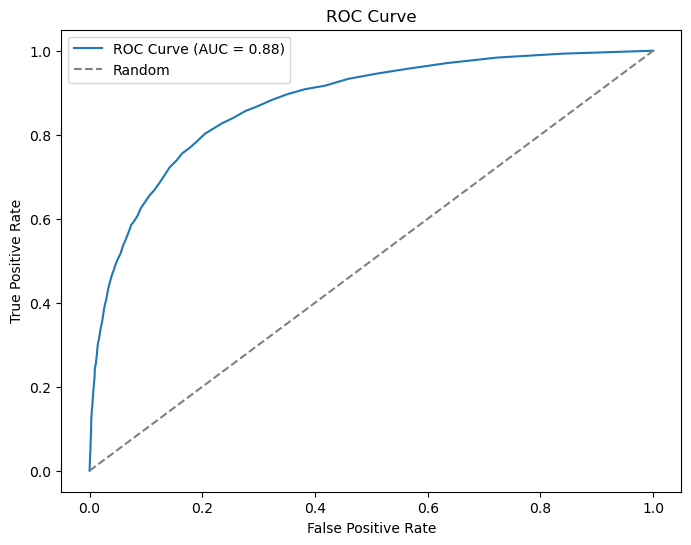

In [332]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_probabilities):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [333]:
# Find the optimal threshold based on the ROC curve
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print(f'Optimal Threshold: {optimal_threshold}')

Optimal Threshold: 0.16


In [334]:
threshold = 0.16

y_pred_adjusted = (y_probabilities >= threshold).astype(int)

In [335]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example: Evaluate the model with adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
confusion = confusion_matrix(y_test, y_pred_adjusted)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")


Accuracy: 0.7959947663007924
Precision: 0.26172768878718533
Recall: 0.8022797018851381
F1 Score: 0.3946942736978324
Confusion Matrix:
[[20071  5162]
 [  451  1830]]


In [336]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred_adjusted)) #k nearest neighbour 

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     25233
           1       0.26      0.80      0.39      2281

    accuracy                           0.80     27514
   macro avg       0.62      0.80      0.64     27514
weighted avg       0.92      0.80      0.84     27514



#### Adaboost

In [337]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X and y are your features and target variable
#X_train, X_test, y_train, y_test = train_test_split(X, df_target, test_size=0.2, random_state=42)

# Create a weak learner (base model), e.g., a decision tree
base_model = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the weak learner
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [338]:
y_trained_pred = adaboost_model.predict(X_train)

# Obtain the confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_trained_pred)

# Print the confusion matrix for training data
print("Confusion Matrix on Training Data:")
print(conf_matrix_train)

# Calculate and print the accuracy on training data
accuracy_train = accuracy_score(y_train, y_trained_pred)
print(f"Accuracy on Training Data: {accuracy_train:.4f}")

Confusion Matrix on Training Data:
[[56619  1946]
 [ 5152  6561]]
Accuracy on Training Data: 0.8990


In [339]:
print(metrics.classification_report(y_train,y_trained_pred)) #adaboosting


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     58565
           1       0.77      0.56      0.65     11713

    accuracy                           0.90     70278
   macro avg       0.84      0.76      0.79     70278
weighted avg       0.89      0.90      0.89     70278



In [340]:
y_test_pred=adaboost_model.predict(X_test)

In [341]:
print(metrics.classification_report(y_test,y_test_pred)) #adaboosting

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     25233
           1       0.51      0.38      0.43      2281

    accuracy                           0.92     27514
   macro avg       0.73      0.67      0.70     27514
weighted avg       0.91      0.92      0.91     27514



### Majority Vote

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

In [343]:
# Train individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
nb_model = GaussianNB()
#adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)



In [344]:
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
#adaboost_model.fit(X_train, y_train)


GaussianNB()

In [345]:


# Assuming X and y are your feature matrix and target variable
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Generate predictions from each model
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
adb_predictions=adaboost_model.predict(X_test)

# Aggregate predictions using majority vote
majority_vote_predictions = np.array([np.argmax(np.bincount([rf, knn, nb])) for rf, knn, nb in zip(rf_predictions, knn_predictions, nb_predictions)])

# Evaluate the performance of the Majority Vote
accuracy = accuracy_score(y_test, majority_vote_predictions)
print(f'Majority Vote Accuracy: {accuracy}')
print(metrics.classification_report(y_test,majority_vote_predictions))

Majority Vote Accuracy: 0.8885294759031765
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     25233
           1       0.36      0.44      0.40      2281

    accuracy                           0.89     27514
   macro avg       0.65      0.69      0.67     27514
weighted avg       0.90      0.89      0.89     27514



In [349]:
from sklearn.tree import DecisionTreeClassifier

In [350]:
# Train individual models
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
lr_model = LogisticRegression()
nb_model = GaussianNB()
#adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)



In [351]:
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
#adaboost_model.fit(X_train, y_train)


GaussianNB()

In [352]:


# Assuming X and y are your feature matrix and target variable
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Generate predictions from each model
dt_predictions = dt_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
#adb_predictions=adaboost_model.predict(X_test)

# Aggregate predictions using majority vote
majority_vote_predictions = np.array([np.argmax(np.bincount([dt, lr, nb])) for dt, lr, nb in zip(dt_predictions, lr_predictions, nb_predictions)])

# Evaluate the performance of the Majority Vote
accuracy = accuracy_score(y_test, majority_vote_predictions)
print(f'Majority Vote Accuracy: {accuracy}')
print(metrics.classification_report(y_test,majority_vote_predictions))

Majority Vote Accuracy: 0.9093188922003343
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     25233
           1       0.45      0.41      0.43      2281

    accuracy                           0.91     27514
   macro avg       0.70      0.68      0.69     27514
weighted avg       0.91      0.91      0.91     27514

